In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

from sklearn.metrics import confusion_matrix

In [5]:
Smarket = pd.read_csv(r"C:/Users/lysyy/Downloads/Smarket.csv")

Smarket

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.19130,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.29650,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.41120,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.27600,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.20570,0.213,Up
...,...,...,...,...,...,...,...,...,...
1245,2005,0.422,0.252,-0.024,-0.584,-0.285,1.88850,0.043,Up
1246,2005,0.043,0.422,0.252,-0.024,-0.584,1.28581,-0.955,Down
1247,2005,-0.955,0.043,0.422,0.252,-0.024,1.54047,0.130,Up
1248,2005,0.130,-0.955,0.043,0.422,0.252,1.42236,-0.298,Down


In [7]:
train = (Smarket["Year"] < 2005)

X_train = Smarket[train].drop(columns = ['Direction', 'Year', 'Today'])
y_train = Smarket.loc[train, 'Direction']

X_test = Smarket[~train].drop(columns = ['Direction', 'Year', 'Today'])
y_test = Smarket.loc[~train, 'Direction']

In [9]:
logit = LogisticRegression()
logit.fit(X_train, y_train)

logit.score(X_test, y_test)

0.4880952380952381

In [11]:
X_train = Smarket.loc[train, ['Lag1', 'Lag2']]
y_train = Smarket.loc[train, ['Direction']]
X_test = Smarket.loc[~train, ['Lag1', 'Lag2']]
y_test = Smarket.loc[~train, ['Direction']]

In [13]:
logit = LogisticRegression()
logit.fit(X_train,y_train)

logit.score(X_test,y_test)

C:\Users\lysyy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5595238095238095

In [15]:
# Liniowa analiza dyskryminacyjna

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

C:\Users\lysyy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearDiscriminantAnalysis()

In [21]:
pd.Series(lda.priors_, index = lda.classes_)

Down    0.491984
Up      0.508016
dtype: float64

In [23]:
lda.score(X_test, y_test)

0.5595238095238095

In [25]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

C:\Users\lysyy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


QuadraticDiscriminantAnalysis()

In [29]:
pd.Series(qda.priors_, index = qda.classes_)

Down    0.491984
Up      0.508016
dtype: float64

In [31]:
qda.score(X_test, y_test)

0.5992063492063492

In [33]:
# Kneighbors classifiers

from sklearn.neighbors import KNeighborsClassifier

In [37]:
np.random.seed(1)

knn1 = KNeighborsClassifier(n_neighbors = 1)
knn1.fit(X_train, y_train)
knn1.score(X_test, y_test)

C:\Users\lysyy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.5

In [39]:
knn3 = KNeighborsClassifier(n_neighbors = 3)
knn3.fit(X_train, y_train)
knn3.score(X_test, y_test)

C:\Users\lysyy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.5317460317460317

In [41]:
knn_scores = []

for k in range (1, 16, 2):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    knn_scores.append(knn.score(X_test, y_test))

C:\Users\lysyy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\lysyy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\lysyy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

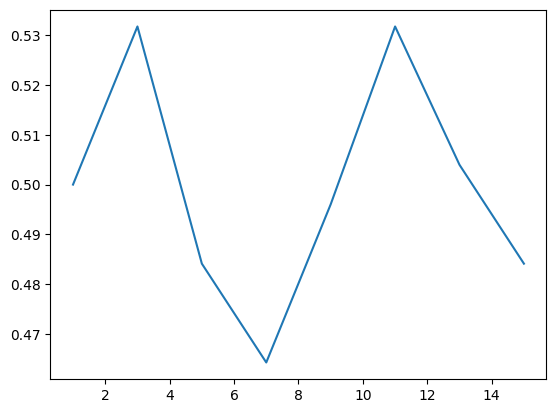

In [43]:
plt.plot(range(1, 16, 2), knn_scores)

In [ ]:


from sklearn.naive_bayes import GaussianNB